# Synthetic Population Generation with the American Community Survey Data (Texas)

In [1]:
import os
os.getcwd()

'/Users/william/Google Drive/gradschool/phd/research/Dissertation/implementations/experiments'

In [1]:
# Import libraries
import sys
import os
import numpy as np
import pandas as pd
import random
import timeit

# Get the root directory
os.chdir('/Users/william/Google Drive/gradschool/PhD/Research/Dissertation/implementations')
import utils
import ipf_utils
from utils import apply_copula, sample_copula, sample_from_bn, result_table
from ipf_utils import std_ipf, sbipf, nbipf, compute_marginals, modify_margins
from pyipu import ipu, synthesize
# Here is a bit of magic to reload external python modules
%load_ext autoreload
%autoreload 2


/opt/miniconda3/envs/popgen2/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## State Level Experiment

In [5]:
# read in all the state of Texas data already processed
texas = pd.read_csv('data/ACS/Texas/texas_treated.csv')

print(texas.shape)

# Split data into source and target using a non-representative split
# to challenge the synthesizers.
texas_source_10, texas_target_10 = utils.source_target_split(texas, low=0.5, high=1.5, split_ratio= 0.1, random_seed=123)

# Save the 10% source data for the feature clustering 
texas_source_10.to_csv('data/ACS/Texas/texas_source_10.csv', index=None)

print(texas_source_10.shape, texas_target_10.shape)

(1176983, 26)
(117698, 26) (1059285, 26)


### 10% Source

Running IPU ....

Running SBIPF ....

Running NBIPF ....

Running SBIPF with random partition ....

Running NBIPF with random partition ....



INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'RMSP': 'N', 'BDSP': 'N', 'NP': 'N', 'HINCP': 'N', 'AGEP': 'N', 'RNTM': 'N', 'ESR': 'N', 'RAC1P': 'N', 'SEX': 'N', 'HICOV': 'N', 'NWLK': 'N', 'HUPAC': 'N', 'WIF': 'N', 'HHT': 'N', 'TEN': 'N', 'SCHL': 'N', 'WKW': 'N', 'WKL': 'N', 'VEH': 'N', 'TEL': 'N', 'SCH': 'N', 'JWRIP': 'N', 'HHL': 'N', 'ENG': 'N', 'CIT': 'N', 'COW': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'RMSP': 'N', 'BDSP': 'N', 'NP': 'N', 'HINCP': 'N', 'AGEP': 'N', 'RNTM': 'N', 'ESR': 'N', 'RAC1P': 'N', 'SEX': 'N', 'HICOV': 'N', 'NWLK': 'N', 'HUPAC': 'N', 'WIF': 'N', 'HHT': 'N', 'TEN': 'N', 'SCHL': 'N', 'WKW': 'N', 'WKL': 'N', 'VEH': 'N', 'TEL': 'N', 'SCH': 'N', 'JWRIP': 'N', 'HHL': 'N', 'ENG': 'N', 'CIT': 'N', 'COW': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'RMSP': 'N', 'BDSP': 'N', 'N

Running BN ....



INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'RMSP': 'N', 'BDSP': 'N', 'NP': 'N', 'HINCP': 'N', 'AGEP': 'N', 'RNTM': 'N', 'ESR': 'N', 'RAC1P': 'N', 'SEX': 'N', 'HICOV': 'N', 'NWLK': 'N', 'HUPAC': 'N', 'WIF': 'N', 'HHT': 'N', 'TEN': 'N', 'SCHL': 'N', 'WKW': 'N', 'WKL': 'N', 'VEH': 'N', 'TEL': 'N', 'SCH': 'N', 'JWRIP': 'N', 'HHL': 'N', 'ENG': 'N', 'CIT': 'N', 'COW': 'N'}
Generating for node: RAC1P: 100%|██████████| 26/26 [00:12<00:00,  2.16it/s]


Running BN with Copula normalization ....



INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'RMSP': 'N', 'BDSP': 'N', 'NP': 'N', 'HINCP': 'N', 'AGEP': 'N', 'RNTM': 'N', 'ESR': 'N', 'RAC1P': 'N', 'SEX': 'N', 'HICOV': 'N', 'NWLK': 'N', 'HUPAC': 'N', 'WIF': 'N', 'HHT': 'N', 'TEN': 'N', 'SCHL': 'N', 'WKW': 'N', 'WKL': 'N', 'VEH': 'N', 'TEL': 'N', 'SCH': 'N', 'JWRIP': 'N', 'HHL': 'N', 'ENG': 'N', 'CIT': 'N', 'COW': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'RMSP': 'N', 'BDSP': 'N', 'NP': 'N', 'HINCP': 'N', 'AGEP': 'N', 'RNTM': 'N', 'ESR': 'N', 'RAC1P': 'N', 'SEX': 'N', 'HICOV': 'N', 'NWLK': 'N', 'HUPAC': 'N', 'WIF': 'N', 'HHT': 'N', 'TEN': 'N', 'SCHL': 'N', 'WKW': 'N', 'WKL': 'N', 'VEH': 'N', 'TEL': 'N', 'SCH': 'N', 'JWRIP': 'N', 'HHL': 'N', 'ENG': 'N', 'CIT': 'N', 'COW': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'RMSP': 'N', 'BDSP': 'N', 'N

Running IPU + BN ....



INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'RMSP': 'N', 'BDSP': 'N', 'NP': 'N', 'HINCP': 'N', 'AGEP': 'N', 'RNTM': 'N', 'ESR': 'N', 'RAC1P': 'N', 'SEX': 'N', 'HICOV': 'N', 'NWLK': 'N', 'HUPAC': 'N', 'WIF': 'N', 'HHT': 'N', 'TEN': 'N', 'SCHL': 'N', 'WKW': 'N', 'WKL': 'N', 'VEH': 'N', 'TEL': 'N', 'SCH': 'N', 'JWRIP': 'N', 'HHL': 'N', 'ENG': 'N', 'CIT': 'N', 'COW': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'RMSP': 'N', 'BDSP': 'N', 'NP': 'N', 'HINCP': 'N', 'AGEP': 'N', 'RNTM': 'N', 'ESR': 'N', 'RAC1P': 'N', 'SEX': 'N', 'HICOV': 'N', 'NWLK': 'N', 'HUPAC': 'N', 'WIF': 'N', 'HHT': 'N', 'TEN': 'N', 'SCHL': 'N', 'WKW': 'N', 'WKL': 'N', 'VEH': 'N', 'TEL': 'N', 'SCH': 'N', 'JWRIP': 'N', 'HHL': 'N', 'ENG': 'N', 'CIT': 'N', 'COW': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'RMSP': 'N', 'BDSP': 'N', 'N

Running SBIPF + BN ....



INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'RMSP': 'N', 'BDSP': 'N', 'NP': 'N', 'HINCP': 'N', 'AGEP': 'N', 'RNTM': 'N', 'ESR': 'N', 'RAC1P': 'N', 'SEX': 'N', 'HICOV': 'N', 'NWLK': 'N', 'HUPAC': 'N', 'WIF': 'N', 'HHT': 'N', 'TEN': 'N', 'SCHL': 'N', 'WKW': 'N', 'WKL': 'N', 'VEH': 'N', 'TEL': 'N', 'SCH': 'N', 'JWRIP': 'N', 'HHL': 'N', 'ENG': 'N', 'CIT': 'N', 'COW': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'RMSP': 'N', 'BDSP': 'N', 'NP': 'N', 'HINCP': 'N', 'AGEP': 'N', 'RNTM': 'N', 'ESR': 'N', 'RAC1P': 'N', 'SEX': 'N', 'HICOV': 'N', 'NWLK': 'N', 'HUPAC': 'N', 'WIF': 'N', 'HHT': 'N', 'TEN': 'N', 'SCHL': 'N', 'WKW': 'N', 'WKL': 'N', 'VEH': 'N', 'TEL': 'N', 'SCH': 'N', 'JWRIP': 'N', 'HHL': 'N', 'ENG': 'N', 'CIT': 'N', 'COW': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'RMSP': 'N', 'BDSP': 'N', 'N

Running NBIPF + BN ....



INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'RMSP': 'N', 'BDSP': 'N', 'NP': 'N', 'HINCP': 'N', 'AGEP': 'N', 'RNTM': 'N', 'ESR': 'N', 'RAC1P': 'N', 'SEX': 'N', 'HICOV': 'N', 'NWLK': 'N', 'HUPAC': 'N', 'WIF': 'N', 'HHT': 'N', 'TEN': 'N', 'SCHL': 'N', 'WKW': 'N', 'WKL': 'N', 'VEH': 'N', 'TEL': 'N', 'SCH': 'N', 'JWRIP': 'N', 'HHL': 'N', 'ENG': 'N', 'CIT': 'N', 'COW': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'RMSP': 'N', 'BDSP': 'N', 'NP': 'N', 'HINCP': 'N', 'AGEP': 'N', 'RNTM': 'N', 'ESR': 'N', 'RAC1P': 'N', 'SEX': 'N', 'HICOV': 'N', 'NWLK': 'N', 'HUPAC': 'N', 'WIF': 'N', 'HHT': 'N', 'TEN': 'N', 'SCHL': 'N', 'WKW': 'N', 'WKL': 'N', 'VEH': 'N', 'TEL': 'N', 'SCH': 'N', 'JWRIP': 'N', 'HHL': 'N', 'ENG': 'N', 'CIT': 'N', 'COW': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'RMSP': 'N', 'BDSP': 'N', 'N

Running SBIPF-RP + BN ....



INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'RMSP': 'N', 'BDSP': 'N', 'NP': 'N', 'HINCP': 'N', 'AGEP': 'N', 'RNTM': 'N', 'ESR': 'N', 'RAC1P': 'N', 'SEX': 'N', 'HICOV': 'N', 'NWLK': 'N', 'HUPAC': 'N', 'WIF': 'N', 'HHT': 'N', 'TEN': 'N', 'SCHL': 'N', 'WKW': 'N', 'WKL': 'N', 'VEH': 'N', 'TEL': 'N', 'SCH': 'N', 'JWRIP': 'N', 'HHL': 'N', 'ENG': 'N', 'CIT': 'N', 'COW': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'RMSP': 'N', 'BDSP': 'N', 'NP': 'N', 'HINCP': 'N', 'AGEP': 'N', 'RNTM': 'N', 'ESR': 'N', 'RAC1P': 'N', 'SEX': 'N', 'HICOV': 'N', 'NWLK': 'N', 'HUPAC': 'N', 'WIF': 'N', 'HHT': 'N', 'TEN': 'N', 'SCHL': 'N', 'WKW': 'N', 'WKL': 'N', 'VEH': 'N', 'TEL': 'N', 'SCH': 'N', 'JWRIP': 'N', 'HHL': 'N', 'ENG': 'N', 'CIT': 'N', 'COW': 'N'}
Generating for node: NWLK: 100%|██████████| 26/26 [00:18<00:00,  1.37it/s] 
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered

Running NBIPF-RP + BN ....



INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'RMSP': 'N', 'BDSP': 'N', 'NP': 'N', 'HINCP': 'N', 'AGEP': 'N', 'RNTM': 'N', 'ESR': 'N', 'RAC1P': 'N', 'SEX': 'N', 'HICOV': 'N', 'NWLK': 'N', 'HUPAC': 'N', 'WIF': 'N', 'HHT': 'N', 'TEN': 'N', 'SCHL': 'N', 'WKW': 'N', 'WKL': 'N', 'VEH': 'N', 'TEL': 'N', 'SCH': 'N', 'JWRIP': 'N', 'HHL': 'N', 'ENG': 'N', 'CIT': 'N', 'COW': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'RMSP': 'N', 'BDSP': 'N', 'NP': 'N', 'HINCP': 'N', 'AGEP': 'N', 'RNTM': 'N', 'ESR': 'N', 'RAC1P': 'N', 'SEX': 'N', 'HICOV': 'N', 'NWLK': 'N', 'HUPAC': 'N', 'WIF': 'N', 'HHT': 'N', 'TEN': 'N', 'SCHL': 'N', 'WKW': 'N', 'WKL': 'N', 'VEH': 'N', 'TEL': 'N', 'SCH': 'N', 'JWRIP': 'N', 'HHL': 'N', 'ENG': 'N', 'CIT': 'N', 'COW': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'RMSP': 'N', 'BDSP': 'N', 'N

Now generating results...

Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Results saved to './experiments/Texas/state-10pct-results.csv'


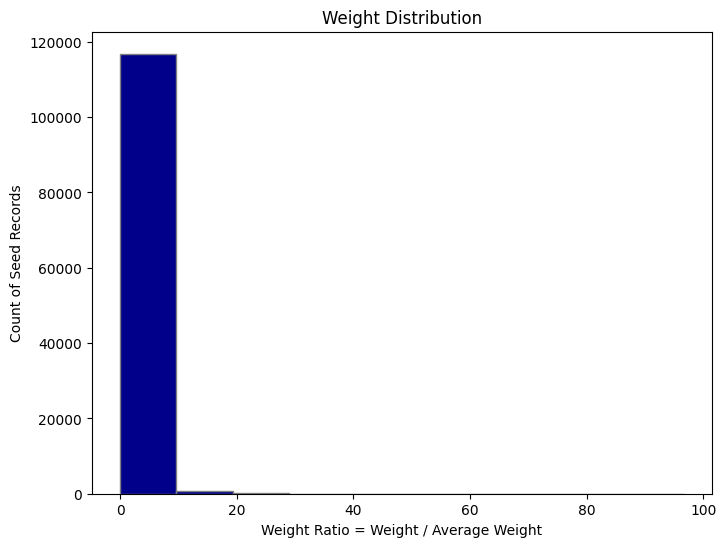

In [11]:
#--- Run th experiments ---
feature_seq = [
    ["RMSP",  "BDSP", "RNTM", 'TEN'],
    ['NP', 'HINCP', 'HUPAC', "WIF", "HHT", 'VEH', 'TEL'],
    ['AGEP', 'NWLK', 'SCHL', 'WKW','SCH', 'JWRIP', 'COW'],
    [ 'ESR', 'WKL', 'SEX'],
    ["RAC1P", "HICOV", "HHL",   "ENG",   "CIT"]
] # See the community detection notebook for more details on the feature sequence
state10_result_tbl = utils.run_syn_pop_experiments(texas_source_10, texas_target_10, feature_seq, n_srmse=4, baseline=False, run_ipf=False,
                              path="./experiments/Texas/state-10pct-results.csv")

# The baseline was excluded because it took several time without results
# When one attempt to run IPF: "MemoryError: Unable to allocate 7.46 EiB for an array with shape (1075402137600000000,)"

### 20% Source

In [12]:
texas_source_20, texas_target_20 = utils.source_target_split(texas, low=0.5, high=1.5, split_ratio= 0.2, random_seed=123)

# Save the 20% source data for the feature clustering 
texas_source_20.to_csv('data/ACS/Texas/texas_source_20.csv', index=None)

print(texas_source_20.shape, texas_target_20.shape)

(235397, 26) (941586, 26)


Running IPU ....

Running SBIPF ....

Running NBIPF ....

Running SBIPF with random partition ....

Running NBIPF with random partition ....



INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'RMSP': 'N', 'BDSP': 'N', 'NP': 'N', 'HINCP': 'N', 'AGEP': 'N', 'RNTM': 'N', 'ESR': 'N', 'RAC1P': 'N', 'SEX': 'N', 'HICOV': 'N', 'NWLK': 'N', 'HUPAC': 'N', 'WIF': 'N', 'HHT': 'N', 'TEN': 'N', 'SCHL': 'N', 'WKW': 'N', 'WKL': 'N', 'VEH': 'N', 'TEL': 'N', 'SCH': 'N', 'JWRIP': 'N', 'HHL': 'N', 'ENG': 'N', 'CIT': 'N', 'COW': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'RMSP': 'N', 'BDSP': 'N', 'NP': 'N', 'HINCP': 'N', 'AGEP': 'N', 'RNTM': 'N', 'ESR': 'N', 'RAC1P': 'N', 'SEX': 'N', 'HICOV': 'N', 'NWLK': 'N', 'HUPAC': 'N', 'WIF': 'N', 'HHT': 'N', 'TEN': 'N', 'SCHL': 'N', 'WKW': 'N', 'WKL': 'N', 'VEH': 'N', 'TEL': 'N', 'SCH': 'N', 'JWRIP': 'N', 'HHL': 'N', 'ENG': 'N', 'CIT': 'N', 'COW': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'RMSP': 'N', 'BDSP': 'N', 'N

Running BN ....



INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'RMSP': 'N', 'BDSP': 'N', 'NP': 'N', 'HINCP': 'N', 'AGEP': 'N', 'RNTM': 'N', 'ESR': 'N', 'RAC1P': 'N', 'SEX': 'N', 'HICOV': 'N', 'NWLK': 'N', 'HUPAC': 'N', 'WIF': 'N', 'HHT': 'N', 'TEN': 'N', 'SCHL': 'N', 'WKW': 'N', 'WKL': 'N', 'VEH': 'N', 'TEL': 'N', 'SCH': 'N', 'JWRIP': 'N', 'HHL': 'N', 'ENG': 'N', 'CIT': 'N', 'COW': 'N'}
Generating for node: TEL: 100%|██████████| 26/26 [00:11<00:00,  2.28it/s] 


Running BN with Copula normalization ....



INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'RMSP': 'N', 'BDSP': 'N', 'NP': 'N', 'HINCP': 'N', 'AGEP': 'N', 'RNTM': 'N', 'ESR': 'N', 'RAC1P': 'N', 'SEX': 'N', 'HICOV': 'N', 'NWLK': 'N', 'HUPAC': 'N', 'WIF': 'N', 'HHT': 'N', 'TEN': 'N', 'SCHL': 'N', 'WKW': 'N', 'WKL': 'N', 'VEH': 'N', 'TEL': 'N', 'SCH': 'N', 'JWRIP': 'N', 'HHL': 'N', 'ENG': 'N', 'CIT': 'N', 'COW': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'RMSP': 'N', 'BDSP': 'N', 'NP': 'N', 'HINCP': 'N', 'AGEP': 'N', 'RNTM': 'N', 'ESR': 'N', 'RAC1P': 'N', 'SEX': 'N', 'HICOV': 'N', 'NWLK': 'N', 'HUPAC': 'N', 'WIF': 'N', 'HHT': 'N', 'TEN': 'N', 'SCHL': 'N', 'WKW': 'N', 'WKL': 'N', 'VEH': 'N', 'TEL': 'N', 'SCH': 'N', 'JWRIP': 'N', 'HHL': 'N', 'ENG': 'N', 'CIT': 'N', 'COW': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'RMSP': 'N', 'BDSP': 'N', 'N

Running IPU + BN ....



INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'RMSP': 'N', 'BDSP': 'N', 'NP': 'N', 'HINCP': 'N', 'AGEP': 'N', 'RNTM': 'N', 'ESR': 'N', 'RAC1P': 'N', 'SEX': 'N', 'HICOV': 'N', 'NWLK': 'N', 'HUPAC': 'N', 'WIF': 'N', 'HHT': 'N', 'TEN': 'N', 'SCHL': 'N', 'WKW': 'N', 'WKL': 'N', 'VEH': 'N', 'TEL': 'N', 'SCH': 'N', 'JWRIP': 'N', 'HHL': 'N', 'ENG': 'N', 'CIT': 'N', 'COW': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'RMSP': 'N', 'BDSP': 'N', 'NP': 'N', 'HINCP': 'N', 'AGEP': 'N', 'RNTM': 'N', 'ESR': 'N', 'RAC1P': 'N', 'SEX': 'N', 'HICOV': 'N', 'NWLK': 'N', 'HUPAC': 'N', 'WIF': 'N', 'HHT': 'N', 'TEN': 'N', 'SCHL': 'N', 'WKW': 'N', 'WKL': 'N', 'VEH': 'N', 'TEL': 'N', 'SCH': 'N', 'JWRIP': 'N', 'HHL': 'N', 'ENG': 'N', 'CIT': 'N', 'COW': 'N'}
Generating for node: TEL: 100%|██████████| 26/26 [00:14<00:00,  1.85it/s]  
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered

Running SBIPF + BN ....



INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'RMSP': 'N', 'BDSP': 'N', 'NP': 'N', 'HINCP': 'N', 'AGEP': 'N', 'RNTM': 'N', 'ESR': 'N', 'RAC1P': 'N', 'SEX': 'N', 'HICOV': 'N', 'NWLK': 'N', 'HUPAC': 'N', 'WIF': 'N', 'HHT': 'N', 'TEN': 'N', 'SCHL': 'N', 'WKW': 'N', 'WKL': 'N', 'VEH': 'N', 'TEL': 'N', 'SCH': 'N', 'JWRIP': 'N', 'HHL': 'N', 'ENG': 'N', 'CIT': 'N', 'COW': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'RMSP': 'N', 'BDSP': 'N', 'NP': 'N', 'HINCP': 'N', 'AGEP': 'N', 'RNTM': 'N', 'ESR': 'N', 'RAC1P': 'N', 'SEX': 'N', 'HICOV': 'N', 'NWLK': 'N', 'HUPAC': 'N', 'WIF': 'N', 'HHT': 'N', 'TEN': 'N', 'SCHL': 'N', 'WKW': 'N', 'WKL': 'N', 'VEH': 'N', 'TEL': 'N', 'SCH': 'N', 'JWRIP': 'N', 'HHL': 'N', 'ENG': 'N', 'CIT': 'N', 'COW': 'N'}
Generating for node: HUPAC: 100%|██████████| 26/26 [00:14<00:00,  1.74it/s]
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered

Running NBIPF + BN ....



INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'RMSP': 'N', 'BDSP': 'N', 'NP': 'N', 'HINCP': 'N', 'AGEP': 'N', 'RNTM': 'N', 'ESR': 'N', 'RAC1P': 'N', 'SEX': 'N', 'HICOV': 'N', 'NWLK': 'N', 'HUPAC': 'N', 'WIF': 'N', 'HHT': 'N', 'TEN': 'N', 'SCHL': 'N', 'WKW': 'N', 'WKL': 'N', 'VEH': 'N', 'TEL': 'N', 'SCH': 'N', 'JWRIP': 'N', 'HHL': 'N', 'ENG': 'N', 'CIT': 'N', 'COW': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'RMSP': 'N', 'BDSP': 'N', 'NP': 'N', 'HINCP': 'N', 'AGEP': 'N', 'RNTM': 'N', 'ESR': 'N', 'RAC1P': 'N', 'SEX': 'N', 'HICOV': 'N', 'NWLK': 'N', 'HUPAC': 'N', 'WIF': 'N', 'HHT': 'N', 'TEN': 'N', 'SCHL': 'N', 'WKW': 'N', 'WKL': 'N', 'VEH': 'N', 'TEL': 'N', 'SCH': 'N', 'JWRIP': 'N', 'HHL': 'N', 'ENG': 'N', 'CIT': 'N', 'COW': 'N'}
Generating for node: NWLK: 100%|██████████| 26/26 [00:15<00:00,  1.67it/s] 
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered

Running SBIPF-RP + BN ....



INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'RMSP': 'N', 'BDSP': 'N', 'NP': 'N', 'HINCP': 'N', 'AGEP': 'N', 'RNTM': 'N', 'ESR': 'N', 'RAC1P': 'N', 'SEX': 'N', 'HICOV': 'N', 'NWLK': 'N', 'HUPAC': 'N', 'WIF': 'N', 'HHT': 'N', 'TEN': 'N', 'SCHL': 'N', 'WKW': 'N', 'WKL': 'N', 'VEH': 'N', 'TEL': 'N', 'SCH': 'N', 'JWRIP': 'N', 'HHL': 'N', 'ENG': 'N', 'CIT': 'N', 'COW': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'RMSP': 'N', 'BDSP': 'N', 'NP': 'N', 'HINCP': 'N', 'AGEP': 'N', 'RNTM': 'N', 'ESR': 'N', 'RAC1P': 'N', 'SEX': 'N', 'HICOV': 'N', 'NWLK': 'N', 'HUPAC': 'N', 'WIF': 'N', 'HHT': 'N', 'TEN': 'N', 'SCHL': 'N', 'WKW': 'N', 'WKL': 'N', 'VEH': 'N', 'TEL': 'N', 'SCH': 'N', 'JWRIP': 'N', 'HHL': 'N', 'ENG': 'N', 'CIT': 'N', 'COW': 'N'}
Generating for node: CIT: 100%|██████████| 26/26 [00:15<00:00,  1.69it/s]
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, 

Running NBIPF-RP + BN ....



INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'RMSP': 'N', 'BDSP': 'N', 'NP': 'N', 'HINCP': 'N', 'AGEP': 'N', 'RNTM': 'N', 'ESR': 'N', 'RAC1P': 'N', 'SEX': 'N', 'HICOV': 'N', 'NWLK': 'N', 'HUPAC': 'N', 'WIF': 'N', 'HHT': 'N', 'TEN': 'N', 'SCHL': 'N', 'WKW': 'N', 'WKL': 'N', 'VEH': 'N', 'TEL': 'N', 'SCH': 'N', 'JWRIP': 'N', 'HHL': 'N', 'ENG': 'N', 'CIT': 'N', 'COW': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'RMSP': 'N', 'BDSP': 'N', 'NP': 'N', 'HINCP': 'N', 'AGEP': 'N', 'RNTM': 'N', 'ESR': 'N', 'RAC1P': 'N', 'SEX': 'N', 'HICOV': 'N', 'NWLK': 'N', 'HUPAC': 'N', 'WIF': 'N', 'HHT': 'N', 'TEN': 'N', 'SCHL': 'N', 'WKW': 'N', 'WKL': 'N', 'VEH': 'N', 'TEL': 'N', 'SCH': 'N', 'JWRIP': 'N', 'HHL': 'N', 'ENG': 'N', 'CIT': 'N', 'COW': 'N'}
Generating for node: RAC1P: 100%|██████████| 26/26 [00:15<00:00,  1.70it/s]
INFO:sdv.metadata.single_table:Detected metadata:
INFO:sdv

Now generating results...

Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Results saved to './experiments/Texas/state-20pct-results.csv'


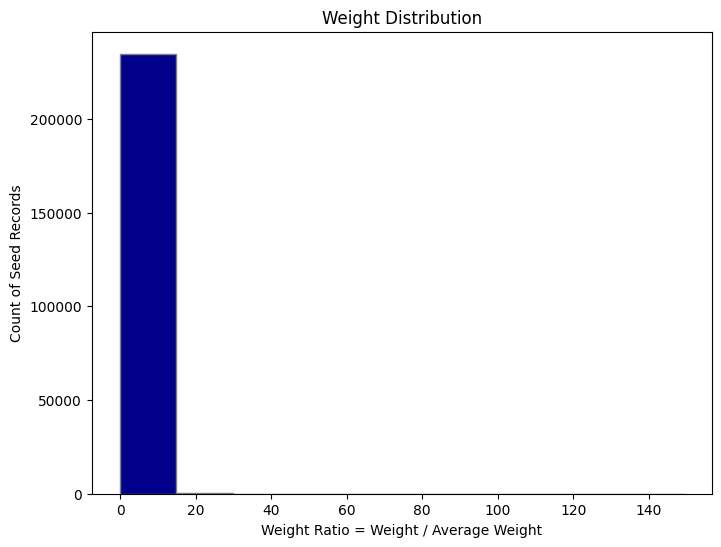

In [13]:
#--- Run th experiments ---
# The same grouping structure was obtained for the 20% source sample
feature_seq = [
    ["RMSP",  "BDSP", "RNTM", 'TEN'],
    ['NP', 'HINCP', 'HUPAC', "WIF", "HHT", 'VEH', 'TEL'],
    ['AGEP', 'NWLK', 'SCHL', 'WKW','SCH', 'JWRIP', 'COW'],
    [ 'ESR', 'WKL', 'SEX'],
    ["RAC1P", "HICOV", "HHL",   "ENG",   "CIT"]
] # See the community detection notebook for more details on the feature sequence
state20_result_tbl = utils.run_syn_pop_experiments(texas_source_20, texas_target_20, feature_seq, n_srmse=4, baseline=False, run_ipf=False,
                              path="./experiments/Texas/state-20pct-results.csv")

# The baseline was excluded because it took several time without results
# When one attempt to run IPF: "MemoryError: Unable to allocate 7.46 EiB for an array with shape (1075402137600000000,)"

### Results

In [15]:
state10_result_tbl

,SRMSE 1,SRMSE 2,SRMSE 3,SRMSE 4,MACD_C,Diversity,Runtime
IPU,0.0021,0.0214,0.0710,0.1944,0.025,0.0000,424.8639
SBIPF-GB,0.0509,0.1318,0.2775,0.5607,0.028,0.0000,21.3141
NBIPF-GB,0.4153,1.0108,2.0376,3.8932,0.054,0.0000,6.0309
SBIPF-RP,0.0328,0.0897,0.1964,0.4132,0.027,0.0000,17.7768
NBIPF-RP,0.5704,1.4063,2.8197,5.3485,0.069,0.0000,2.6998
BN,0.4243,1.1224,2.6137,5.7870,0.140,0.9635,16.2612
BN Copula,0.0034,0.3121,1.1812,3.3162,0.129,0.9998,184.6667
IPU BN,0.0079,0.0683,0.2458,0.7107,0.145,0.9824,488.4261
SBIPF-GB BN,0.0502,0.1623,0.4317,1.0662,0.151,0.9846,85.9739
NBIPF-GB BN,0.4147,1.1690,2.7967,6.3117,0.146,0.9633,71.8623


In [16]:
state20_result_tbl

,SRMSE 1,SRMSE 2,SRMSE 3,SRMSE 4,MACD_C,Diversity,Runtime
IPU,0.0019,0.0184,0.0591,0.1568,0.025,0.0000,899.8664
SBIPF-GB,0.0495,0.1262,0.2611,0.5174,0.027,0.0000,19.5223
NBIPF-GB,0.4011,0.9786,1.9822,3.8022,0.050,0.0000,7.9799
SBIPF-RP,0.0323,0.0870,0.1879,0.3876,0.027,0.0000,15.9046
NBIPF-RP,0.5390,1.3298,2.6712,5.0678,0.064,0.0000,4.7878
BN,0.4179,1.1003,2.5412,5.6438,0.135,0.9461,20.1326
BN Copula,0.0038,0.3046,1.1478,3.2345,0.124,0.9998,168.6598
IPU BN,0.0056,0.0670,0.2440,0.7026,0.142,0.9771,948.8768
SBIPF-GB BN,0.0491,0.1601,0.4300,1.0672,0.154,0.9778,68.7741
NBIPF-GB BN,0.4009,1.1035,2.6183,5.9542,0.145,0.9610,58.4966


## PUMA-to-PUMA Population Synthesis

### From PUMA 1201 in Anne Arundel County to PUMA 804 in Baltimore city

In [ ]:
source = pd.read_csv('./data/ACS/Maryland/counties/Anne Arundel/PUMA_1201_Sample_Treated.csv').drop(["PUMA"] , axis=1)
target = pd.read_csv('./data/ACS/Maryland/counties/Baltimore City/PUMA_804_Sample_Treated.csv').drop(["PUMA"] , axis=1)
print(source.shape, target.shape)
print(source.columns.to_list())

# Align categories/levels: This ensures that both datasets have the same categories for each feature.
source, target = utils.align_categories(source, target)
print(source.shape, target.shape)

(6533, 9) (6049, 9)
['HINCP', 'NP', 'AGEP', 'RAC1P', 'ESR', 'SEX', 'WIF', 'HUPAC', 'HHT']
(6533, 9) (6049, 9)


/Users/william/Google Drive/gradschool/phd/research/Dissertation/implementations/utils.py:826: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ind_data[i,j] = source[columns[j]].sample(1)
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'HINCP': 'N', 'NP': 'N', 'AGEP': 'N', 'RAC1P': 'N', 'ESR': 'N', 'SEX': 'N', 'WIF': 'N', 'HUPAC': 'N', 'HHT': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'HINCP': 'N', 'NP': 'N', 'AGEP': 'N', 'RAC1P': 'N', 'ESR': 'N', 'SEX': 'N', 'WIF': 'N', 'HUPAC': 'N', 'HHT': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'HINCP': 'N', 'NP': 'N', 'AGEP': 'N', 'RAC1P': 'N', 'ESR': 'N', 'SEX': 'N', 'WIF': 'N', 'HUPAC': 'N', 'HHT': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unorde

Sample size for diversity score computation: 6049
Sample size for diversity score computation: 6049
Sample size for diversity score computation: 6049
Sample size for diversity score computation: 6049
Sample size for diversity score computation: 6049
Sample size for diversity score computation: 6049
Sample size for diversity score computation: 6049
Sample size for diversity score computation: 6049
Sample size for diversity score computation: 6049
Sample size for diversity score computation: 6049
Sample size for diversity score computation: 6049
Sample size for diversity score computation: 6049
Sample size for diversity score computation: 6049
Sample size for diversity score computation: 6049
Sample size for diversity score computation: 6049


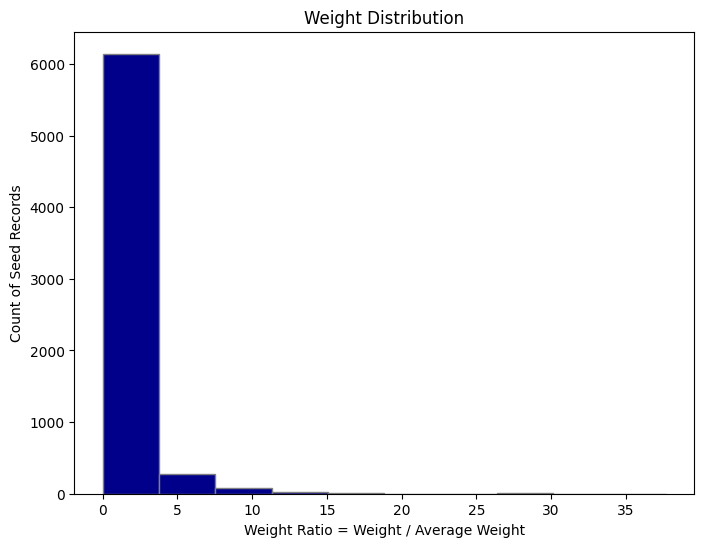

In [7]:
#--- Run th experiments ---
feature_seq = [['HINCP', 'SEX', 'WIF', 'HHT'], ['NP', 'AGEP', 'RAC1P', 'ESR', 'HUPAC']]
result_tbl = utils.run_syn_pop_experiments(source, target, feature_seq, n_srmse=4,
                              path="./experiments/Maryland/puma-results.csv")
# Takes about 5 minutes to run

In [10]:
result_tbl

,SRMSE 1,SRMSE 2,SRMSE 3,SRMSE 4,MACD_C,Diversity,Runtime
Independent,0.6093,1.3166,2.3963,4.2907,0.188,0.9816,3.6336
IPF,0.0329,0.3520,1.0699,2.7708,0.056,0.0000,154.5668
IPU,0.0301,0.3409,1.0530,2.7457,0.058,0.0000,8.7747
SBIPF-GB,0.0551,0.3872,1.1561,2.9991,0.062,0.0000,0.1435
NBIPF-GB,0.3489,0.8760,1.9695,4.4825,0.080,0.0000,0.1318
SBIPF-RP,0.0765,0.4257,1.1903,3.0408,0.066,0.0000,0.1308
NBIPF-RP,0.3733,0.9838,2.1948,4.9216,0.089,0.0000,0.1341
BN,0.6023,1.7425,4.5441,11.4899,0.207,0.8239,0.0974
BN Copula,0.0305,0.8307,3.1544,9.5083,0.183,0.9889,0.5121
IPF BN,0.0543,0.6827,2.7131,8.7874,0.178,0.9254,154.6721


### From PUMA 1201 in Anne Arundel County to PUMA 200 in Washington County

In [24]:
target = pd.read_csv('./data/ACS/Maryland/counties/Frederick/PUMA_302_Sample_Treated.csv').drop(["PUMA"] , axis=1)
print(source.shape, target.shape)
print(source.columns.to_list())

source, target = utils.align_categories(source, target)
print(source.shape, target.shape)

(6532, 9) (5546, 9)
['HINCP', 'NP', 'AGEP', 'RAC1P', 'ESR', 'SEX', 'WIF', 'HUPAC', 'HHT']
(6532, 9) (5538, 9)


In [28]:
county_source['RAC1P'].value_counts()

RAC1P
1    18020
2     2585
6      753
9      710
8      243
3       17
5        9
7        7
Name: count, dtype: int64

In [27]:
county_target['RAC1P'].value_counts()

RAC1P
2    15326
1    10091
6      726
9      571
8      321
3       31
5       26
7       11
Name: count, dtype: int64

/Users/william/Google Drive/gradschool/phd/research/Dissertation/implementations/utils.py:826: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ind_data[i,j] = source[columns[j]].sample(1)


ipfn converged: convergence_rate not updating or below rate_tolerance


INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'HINCP': 'N', 'NP': 'N', 'AGEP': 'N', 'RAC1P': 'N', 'ESR': 'N', 'SEX': 'N', 'WIF': 'N', 'HUPAC': 'N', 'HHT': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'HINCP': 'N', 'NP': 'N', 'AGEP': 'N', 'RAC1P': 'N', 'ESR': 'N', 'SEX': 'N', 'WIF': 'N', 'HUPAC': 'N', 'HHT': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'HINCP': 'N', 'NP': 'N', 'AGEP': 'N', 'RAC1P': 'N', 'ESR': 'N', 'SEX': 'N', 'WIF': 'N', 'HUPAC': 'N', 'HHT': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'HINCP': 'N', 'NP': 'N', 'AGEP': 'N', 'RAC1P': 'N', 'ESR': 'N', 'SEX': 'N', 'WIF': 'N', 'HUPAC': 'N', 'HHT': 'N'}
Generating for node: HINCP: 100%|██████████| 9/9 [00:00<00:00, 370.71it/s]
INFO:pgmpy: Datatype (N=numerical, C=Categori

['HINCP', 'NP', 'AGEP', 'RAC1P', 'ESR', 'SEX', 'WIF', 'HUPAC', 'HHT']
['RAC1P', 'HINCP', 'SEX', 'HUPAC', 'NP', 'AGEP', 'WIF', 'ESR']
['HINCP', 'NP', 'AGEP', 'RAC1P', 'ESR', 'SEX', 'WIF', 'HUPAC', 'HHT']
['HHT', 'HINCP', 'SEX', 'HUPAC', 'NP', 'AGEP', 'WIF', 'ESR']
['HINCP', 'NP', 'AGEP', 'RAC1P', 'ESR', 'SEX', 'WIF', 'HUPAC', 'HHT']
['HHT', 'RAC1P', 'SEX', 'HUPAC', 'NP', 'AGEP', 'WIF', 'ESR']
['HINCP', 'NP', 'AGEP', 'RAC1P', 'ESR', 'SEX', 'WIF', 'HUPAC', 'HHT']
['HHT', 'RAC1P', 'HINCP', 'HUPAC', 'NP', 'AGEP', 'WIF', 'ESR']
['HINCP', 'NP', 'AGEP', 'RAC1P', 'ESR', 'SEX', 'WIF', 'HUPAC', 'HHT']
['HHT', 'RAC1P', 'HINCP', 'SEX', 'NP', 'AGEP', 'WIF', 'ESR']
['HINCP', 'NP', 'AGEP', 'RAC1P', 'ESR', 'SEX', 'WIF', 'HUPAC', 'HHT']
['HHT', 'RAC1P', 'HINCP', 'SEX', 'HUPAC', 'AGEP', 'WIF', 'ESR']
['HINCP', 'NP', 'AGEP', 'RAC1P', 'ESR', 'SEX', 'WIF', 'HUPAC', 'HHT']
['HHT', 'RAC1P', 'HINCP', 'SEX', 'HUPAC', 'NP', 'WIF', 'ESR']
['HINCP', 'NP', 'AGEP', 'RAC1P', 'ESR', 'SEX', 'WIF', 'HUPAC', 'HHT']
['HHT

KeyError: "['RAC1P'] not found in axis"

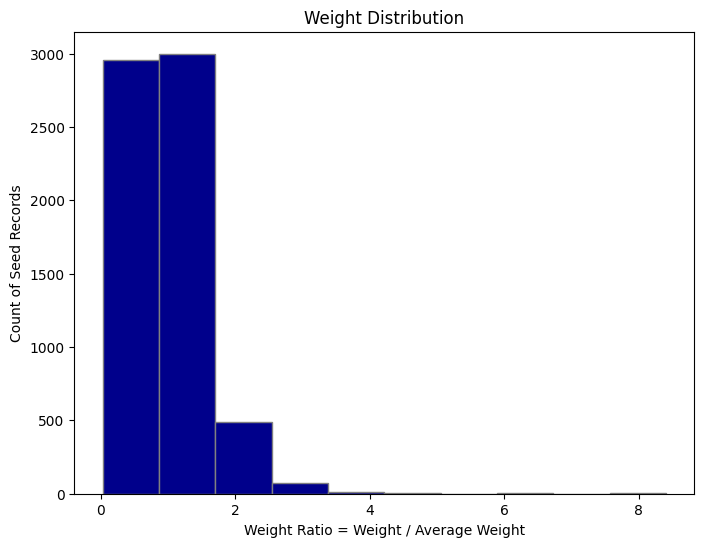

In [29]:
#--- Run the experiments ---
feature_seq = [['HINCP', 'SEX', 'WIF', 'HHT'], ['NP', 'AGEP', 'RAC1P', 'ESR', 'HUPAC']]
result_tbl = utils.run_syn_pop_experiments(source, target, feature_seq, n_srmse=4,
                              path="./experiments/Maryland/puma1201-to-puma302-results.csv")
# Takes about 5 minutes to run

## County-to-County Population Synthesis

### From Dallas County to Dallas City

In [3]:
elpaso = pd.read_csv('./data/ACS/Texas/El Paso/elpaso_treated.csv')
dallas_county = pd.read_csv('./data/ACS/Texas/Dallas County/dallas_county_treated.csv')
dallas_city = pd.read_csv('./data/ACS/Texas/Dallas City/dallas_city_treated.csv')

print(elpaso.shape)
print(dallas_county.shape)
print(dallas_city.shape)
print(elpaso.columns)

# Align categories/levels
# county_source, county_target = utils.align_categories(county_source, county_target)
# print(county_source.shape, county_target.shape)

# Assign source/reference (sample) and target (population)
source_full = dallas_county.copy()
target_full = dallas_city.copy()

# drop PUMA column
# Considered dropping 'NP', 'JWRIP' because of missing categories in one of the sets
source_full.drop(columns=['PUMA'], inplace=True) # , 'NP', 'JWRIP'
target_full.drop(columns=['PUMA'], inplace=True) # , 'NP', 'JWRIP'

print(source_full.shape, target_full.shape)


(32735, 27)
(21590, 27)
(31038, 27)
Index(['RMSP', 'BDSP', 'NP', 'HINCP', 'AGEP', 'RNTM', 'ESR', 'RAC1P', 'SEX',
       'HICOV', 'NWLK', 'HUPAC', 'WIF', 'HHT', 'TEN', 'SCHL', 'WKW', 'WKL',
       'VEH', 'TEL', 'SCH', 'JWRIP', 'HHL', 'ENG', 'CIT', 'COW', 'PUMA'],
      dtype='object')
(21590, 26) (31038, 26)


### Subset of 15 vars

In [4]:
selected_features = list(source_full.columns)[:12]
source_12 = source_full[selected_features]
target_12 = target_full[selected_features]
print(source_12.shape, target_12.shape)
print(source_12.columns)

(21590, 12) (31038, 12)
Index(['RMSP', 'BDSP', 'NP', 'HINCP', 'AGEP', 'RNTM', 'ESR', 'RAC1P', 'SEX',
       'HICOV', 'NWLK', 'HUPAC'],
      dtype='object')


In [ ]:

#--- Run the experiments ---
# Trouble running with 15 variables
feature_seq = [
    ["RMSP",  "BDSP"],
    ['NP','HINCP', "RAC1P", "HICOV",'HUPAC',"WIF","HHT"],
    ['AGEP','ESR','SEX', 'NWLK'],
    ["RNTM", 'TEN']
]

dallas_result_tbl = utils.run_syn_pop_experiments(source_12, target_12, feature_seq,
                             n_srmse=4,
                              path="./experiments/Texas/sub-Dallas-to-DallasCity-results.csv")
# Takes about 6 minutes to run

/Users/william/Google Drive/gradschool/phd/research/Dissertation/implementations/utils.py:826: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ind_data[i,j] = source[columns[j]].sample(1)


: 

/Users/william/Google Drive/gradschool/phd/research/Dissertation/implementations/utils.py:826: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ind_data[i,j] = source[columns[j]].sample(1)


ipfn converged: convergence_rate not updating or below rate_tolerance


INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'RMSP': 'N', 'BDSP': 'N', 'NP': 'N', 'HINCP': 'N', 'AGEP': 'N', 'RNTM': 'N', 'ESR': 'N', 'RAC1P': 'N', 'SEX': 'N', 'HICOV': 'N', 'NWLK': 'N', 'HUPAC': 'N', 'WIF': 'N', 'HHT': 'N', 'TEN': 'N', 'SCHL': 'N', 'WKW': 'N', 'WKL': 'N', 'VEH': 'N', 'TEL': 'N', 'SCH': 'N', 'JWRIP': 'N', 'HHL': 'N', 'ENG': 'N', 'CIT': 'N', 'COW': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'RMSP': 'N', 'BDSP': 'N', 'NP': 'N', 'HINCP': 'N', 'AGEP': 'N', 'RNTM': 'N', 'ESR': 'N', 'RAC1P': 'N', 'SEX': 'N', 'HICOV': 'N', 'NWLK': 'N', 'HUPAC': 'N', 'WIF': 'N', 'HHT': 'N', 'TEN': 'N', 'SCHL': 'N', 'WKW': 'N', 'WKL': 'N', 'VEH': 'N', 'TEL': 'N', 'SCH': 'N', 'JWRIP': 'N', 'HHL': 'N', 'ENG': 'N', 'CIT': 'N', 'COW': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'RMSP': 'N', 'BDSP': 'N', 'N

Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000


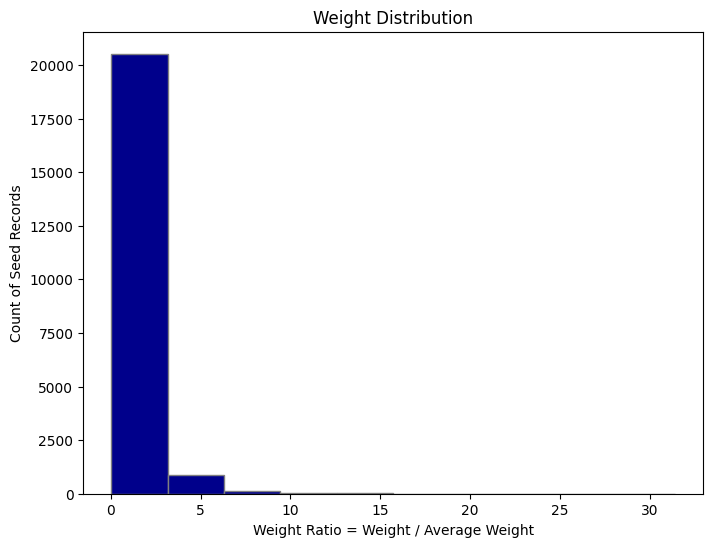

In [ ]:
#--- Run the experiments ---
feature_seq = [
    ["RMSP",  "BDSP", "RNTM", 'TEN'],
    ['NP', 'AGEP', 'HUPAC','SCH'],
    ['HINCP', 'SEX', "WIF", "HHT", 'VEH', 'TEL'],
    ['ESR', 'WKL'],
    ['COW', 'JWRIP', 'WKW', 'SCHL', 'NWLK', ],
    ["RAC1P", "HICOV", "HHL",   "ENG",   "CIT"]
]

dallas_result_tbl = utils.run_syn_pop_experiments(source_full, target_full, feature_seq,
                             n_srmse=4, run_ipf=False,
                              path="./experiments/Texas/Dallas-to-DallasCity-results.csv")
# Takes about 33 minutes to run

In [12]:
dallas_result_tbl

,SRMSE 1,SRMSE 2,SRMSE 3,SRMSE 4,MACD_C,Diversity,Runtime
Independent,0.2135,0.6955,1.5833,3.1695,0.156,1.0000,142.4573
IPU,0.0098,0.0916,0.2811,0.7074,0.023,0.0000,67.3255
SBIPF-GB,0.0506,0.1668,0.4212,0.9881,0.034,0.0000,0.7032
NBIPF-GB,0.3401,0.7668,1.4895,2.8255,0.040,0.0000,0.5300
SBIPF-RP,0.0802,0.2061,0.4686,1.0445,0.035,0.0000,0.6736
NBIPF-RP,0.7176,1.7001,3.4403,6.7220,0.059,0.0000,0.4847
BN,0.2108,0.6175,1.5310,3.5821,0.138,0.9978,1.4262
BN Copula,0.0092,0.2665,0.9356,2.5779,0.133,0.9997,6.7789
IPU BN,0.0165,0.1716,0.6136,1.7635,0.150,0.9979,69.1339
SBIPF-GB BN,0.0485,0.2134,0.6514,1.7510,0.154,0.9974,2.6099


### From Dallas County to El Paso

In [14]:
ep_target_full = elpaso.copy()
ep_target_full.drop(columns=['PUMA'], inplace=True) 

print(source_full.shape, ep_target_full.shape)


(21590, 26) (32735, 26)


/Users/william/Google Drive/gradschool/phd/research/Dissertation/implementations/utils.py:826: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ind_data[i,j] = source[columns[j]].sample(1)


ipfn converged: convergence_rate not updating or below rate_tolerance
ipfn converged: convergence_rate not updating or below rate_tolerance
ipfn converged: convergence_rate not updating or below rate_tolerance
ipfn converged: convergence_rate not updating or below rate_tolerance


INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'RMSP': 'N', 'BDSP': 'N', 'NP': 'N', 'HINCP': 'N', 'AGEP': 'N', 'RNTM': 'N', 'ESR': 'N', 'RAC1P': 'N', 'SEX': 'N', 'HICOV': 'N', 'NWLK': 'N', 'HUPAC': 'N', 'WIF': 'N', 'HHT': 'N', 'TEN': 'N', 'SCHL': 'N', 'WKW': 'N', 'WKL': 'N', 'VEH': 'N', 'TEL': 'N', 'SCH': 'N', 'JWRIP': 'N', 'HHL': 'N', 'ENG': 'N', 'CIT': 'N', 'COW': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'RMSP': 'N', 'BDSP': 'N', 'NP': 'N', 'HINCP': 'N', 'AGEP': 'N', 'RNTM': 'N', 'ESR': 'N', 'RAC1P': 'N', 'SEX': 'N', 'HICOV': 'N', 'NWLK': 'N', 'HUPAC': 'N', 'WIF': 'N', 'HHT': 'N', 'TEN': 'N', 'SCHL': 'N', 'WKW': 'N', 'WKL': 'N', 'VEH': 'N', 'TEL': 'N', 'SCH': 'N', 'JWRIP': 'N', 'HHL': 'N', 'ENG': 'N', 'CIT': 'N', 'COW': 'N'}
INFO:pgmpy: Datatype (N=numerical, C=Categorical Unordered, O=Categorical Ordered) inferred from data: 
 {'RMSP': 'N', 'BDSP': 'N', 'N

Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000
Sample size for diversity score computation: 10000


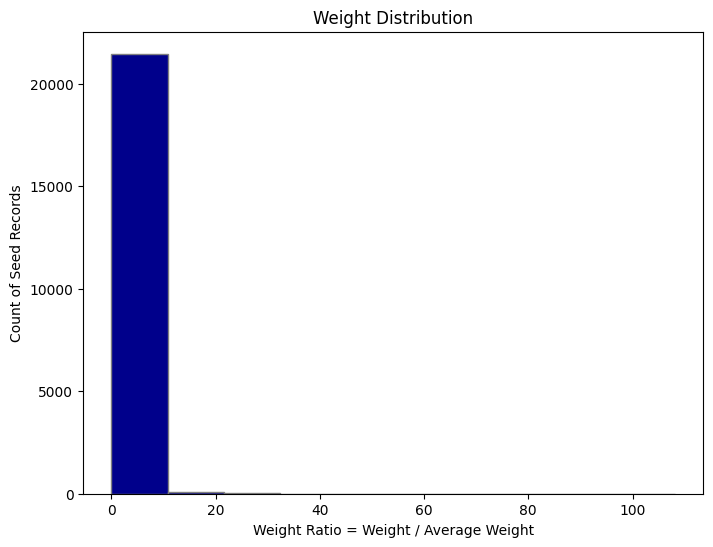

In [27]:
#--- Run the experiments ---
# feature_seq = [
#     ["RMSP",  "BDSP", "RNTM", 'TEN'],
#     ['NP', 'AGEP', 'HUPAC','SCH'],
#     ['HINCP', 'SEX', "WIF", "HHT", 'VEH', 'TEL'],
#     ['ESR', 'WKL'],
#     ['COW', 'JWRIP', 'WKW', 'SCHL', 'NWLK', ],
#     ["RAC1P", "HICOV", "HHL",   "ENG",   "CIT"]
# ]

feature_seq = [['RMSP', 'BDSP', 'RNTM', 'TEN'],
                ['NP', 'AGEP', 'HUPAC', 'SCH'],
                ['HINCP', 'SEX', 'WIF', 'HHT', 'VEH', 'TEL'],
                ['ESR', 'WKL'],
                 ['RAC1P', 'HICOV', 'HHL', 'ENG', 'CIT'],
                ['COW', 'JWRIP', 'WKW', 'SCHL', 'NWLK']]

ep_result_tbl = utils.run_syn_pop_experiments(source_full, ep_target_full, feature_seq,
                             n_srmse=4, run_ipf=False,
                              path="./experiments/Texas/Dallas-to-ElPaso-results2.csv")
# Takes about 26 minutes to run

In [28]:
ep_result_tbl

,SRMSE 1,SRMSE 2,SRMSE 3,SRMSE 4,MACD_C,Diversity,Runtime
Independent,0.2097,0.6742,1.5085,2.9477,0.156,1.0000,154.2423
IPU,0.0098,0.1181,0.3562,0.8744,0.022,0.0000,78.4382
SBIPF-GB,0.0783,0.2403,0.5787,1.3192,0.031,0.0000,0.7295
NBIPF-GB,0.2006,0.5020,1.0688,2.2404,0.042,0.0000,0.5398
SBIPF-RP,0.0864,0.2530,0.5919,1.3113,0.030,0.0000,0.7062
NBIPF-RP,0.2957,0.6789,1.3889,2.8545,0.053,0.0000,0.4845
BN,0.2052,0.5949,1.4294,3.2239,0.138,0.9995,1.4330
BN Copula,0.0123,0.1818,0.6291,1.7040,0.134,0.9998,7.1447
IPU BN,0.0187,0.1474,0.4987,1.3648,0.147,0.9978,80.3377
SBIPF-GB BN,0.0818,0.2730,0.7294,1.8055,0.135,0.9984,2.6654


In [ ]:
# let's find the optimal order for BIPF: runs into errors for some combinations
# target_margins_dict = ipf_utils.ipf_target_in(ep_target_full, source_full, list(source_full.columns))
# sbipf_graph, best_feature_order, w = ipf_utils.optimal_bipf(ipf_utils.sbipf, source_full, target_margins_dict, feature_seq, ipf_utils.ipfn_wrapper, n=ep_target_full.shape[0])
# print(best_feature_order)

# gg = [['RMSP', 'BDSP', 'RNTM', 'TEN'], ['NP', 'AGEP', 'HUPAC', 'SCH'], ['HINCP', 'SEX', 'WIF', 'HHT', 'VEH', 'TEL'], ['ESR', 'WKL'], ['RAC1P', 'HICOV', 'HHL', 'ENG', 'CIT'], ['COW', 'JWRIP', 'WKW', 'SCHL', 'NWLK']]

ipfn converged: convergence_rate not updating or below rate_tolerance
<class 'pandas.core.frame.DataFrame'>
(32735, 26)
ipfn converged: convergence_rate not updating or below rate_tolerance
<class 'pandas.core.frame.DataFrame'>
(32735, 26)
ipfn converged: convergence_rate not updating or below rate_tolerance
<class 'pandas.core.frame.DataFrame'>
(32735, 26)
ipfn converged: convergence_rate not updating or below rate_tolerance
<class 'pandas.core.frame.DataFrame'>
(32735, 26)
ipfn converged: convergence_rate not updating or below rate_tolerance
<class 'pandas.core.frame.DataFrame'>
(32735, 26)
ipfn converged: convergence_rate not updating or below rate_tolerance
<class 'pandas.core.frame.DataFrame'>
(32735, 26)


ValueError: operands could not be broadcast together with shapes (7,) (8,) 

In [24]:
utils.result_table(source_full, ep_target_full, {"SBIPF": sbipf_graph}, set(list(source_full.columns)))

,SRMSE 1,SRMSE 2,SRMSE 3,SRMSE 4,SRMSE 5
SBIPF,0.0773,0.2326,0.5561,1.2529,2.7869
